<h1 style = 'font-family:verdana;color:blue;text-align:center;font-weight:bold'>Welcome To My Notebook</h1>

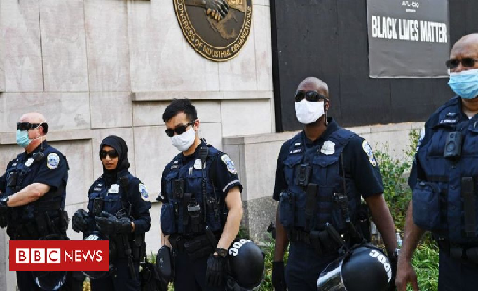

Recently **US Police**  in News because of George Floyd death which was hevily covered wordwide. So Using this data set i tried here to visulize the US police shooting Data.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h2 style = 'font-family:verdana;color:blue;'>Importing Libraries</h2>

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime
import seaborn as sns
import folium
%matplotlib inline

<h2 style = 'font-family:verdana;color:blue;'>Reading Data</h2>

In [ ]:
df = pd.read_csv(r'/kaggle/input/us-police-shootings/shootings.csv')
df.head(2)

<h2 style = 'font-family:verdana;color:blue;'>Getting More Info</h2>

In [ ]:
df.info()

Datframe is cleaned and it doesn't contain any null values.

Here I am going to drop some columns which are not related to furher analysis. 

In [ ]:
df.drop(['name', 'city', 'threat_level', 'arms_category', 'id'], axis = 1, inplace = True)

In [ ]:
states = df['state'].value_counts().nlargest(15).index
deaths = df['state'].value_counts().nlargest(15).values
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
graph1 = sns.barplot(states, deaths)
graph1.set(xlabel = 'States', ylabel = 'Number Of Deaths', title = 'Top 15 States with heighest number of deaths')


def autolabel(graph):
    for patch in graph.patches:
        height = patch.get_height()
        plt.annotate(height.astype('int64'), xy = (patch.get_x() + patch.get_width() / 2, height),
                     xytext = (0, 5), textcoords = 'offset points', ha = 'center', fontsize = 12)

autolabel(graph1)

In [ ]:
s = df['state'].value_counts()
s1 = s.reset_index()


m = folium.Map(location=[40, -102], zoom_start=3,
              tiles='OpenStreetMap')
state_geo = r'/kaggle/input/usstates/us-states.json'

folium.Choropleth(
    geo_data=state_geo,
    data=s1,
    columns=['index', 'state'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of deaths'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [ ]:
year = pd.to_datetime(df['date']).dt.year.value_counts().sort_index().index
death = pd.to_datetime(df['date']).dt.year.value_counts().sort_index().values
graph2 = sns.barplot(year, death,palette=sns.color_palette("GnBu_d"))
graph2.set_title('Year Wise Deaths')
graph2.set_ylabel('Deaths')
autolabel(graph2)

Deaths are nearly same per year. And for 2020 we don't have data for the entire year.

In [ ]:
total = df.shape[0]
gb_object = df.groupby('race')
races = gb_object['race'].count().index
death_numbers = gb_object['race'].count().values
order = [4, 5, 3, 2, 0, 1]  # order is changed because autopct values are overlapping.
races = [races[i] for i in order]
death_numbers = [death_numbers[i] for i in order]
plt.figure(figsize = (8, 6), facecolor = 'white')
plt.pie(death_numbers,  autopct = '%1.1f%%', shadow = True, pctdistance=0.6, startangle=90, radius = 0.8)
plt.legend(races, ncol = 3)
plt.title('Distrubution of Deaths on Race', pad = 5)

50% suspects are white people. I think it happens because, US has more white population than other races.

In [ ]:
text_cloud = " ".join(text for text in df['armed'])

wc = WordCloud(width=2500, height=1500).generate(text_cloud)
plt.figure(figsize = (9, 7))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.title('Freuently Armed Weapons By suspects')
plt.show()


By observing above figure we can say that most of the suspects are carrying **gun** or **knife**.

In [ ]:
gender = ['Male', 'Female']
people = df['gender'].value_counts().values
plt.figure(figsize = (7, 5))
plt.pie(people, labels = gender, shadow= True, autopct = '%1.1f%%', pctdistance=0.6, wedgeprops={'edgecolor': 'black'})
plt.title('Gender wise comparision')

In [ ]:
plt.hist(df['age'], bins = range(0, 100, 10), edgecolor = 'white', color = 'gray')
plt.xticks(range(0, 100, 10))
plt.xlabel('Age')
plt.ylabel('Deaths')
plt.title('Suspects Age based Visual')

In [ ]:
minor = df.loc[df['age'] < 18].shape[0]
print('Minor suspects killed in US from 2015 to 2020 =>', minor)

By considering adult age 18, there are 97 suspects killed in 5 years. For crime of murder or any kind of serious crime a person with 16 or 17 age can treat as a Adult.

If u like this notebook dont forget to **UPVOTE**, or if don't please leave suggestion which was very helfull for me. **Thank You**